<a href="https://colab.research.google.com/github/zainabbas313/GROW-INTERN-INTERNSHIP/blob/main/HANDWRITTEN_DIGITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GROW-INTERN INTERNSHIP -  TASK_03

# LIRARIES

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# LOAD DATASET

In [21]:
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()

In [22]:
print(f'shape of train data : {xtrain.shape} , {ytrain.shape}')
print(f'shape of test data : {xtest.shape} , {ytest.shape}')

shape of train data : (60000, 28, 28) , (60000,)
shape of test data : (10000, 28, 28) , (10000,)


In [34]:
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1).astype('float32') / 255
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1).astype('float32') / 255

In [35]:
ytrain = to_categorical(ytrain, 10)
ytest = to_categorical(ytest, 10)

# MODEL TRAINING

In [37]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [39]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [41]:
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 46s - loss: 0.3718 - accuracy: 0.8874 - val_loss: 0.0760 - val_accuracy: 0.9751 - 46s/epoch - 152ms/step
Epoch 2/10
300/300 - 54s - loss: 0.1143 - accuracy: 0.9658 - val_loss: 0.0467 - val_accuracy: 0.9835 - 54s/epoch - 180ms/step
Epoch 3/10
300/300 - 39s - loss: 0.0826 - accuracy: 0.9759 - val_loss: 0.0378 - val_accuracy: 0.9883 - 39s/epoch - 131ms/step
Epoch 4/10
300/300 - 42s - loss: 0.0691 - accuracy: 0.9796 - val_loss: 0.0303 - val_accuracy: 0.9896 - 42s/epoch - 139ms/step
Epoch 5/10
300/300 - 42s - loss: 0.0549 - accuracy: 0.9836 - val_loss: 0.0273 - val_accuracy: 0.9915 - 42s/epoch - 140ms/step
Epoch 6/10
300/300 - 40s - loss: 0.0510 - accuracy: 0.9845 - val_loss: 0.0288 - val_accuracy: 0.9910 - 40s/epoch - 133ms/step
Epoch 7/10
300/300 - 42s - loss: 0.0425 - accuracy: 0.9869 - val_loss: 0.0269 - val_accuracy: 0.9914 - 42s/epoch - 138ms/step
Epoch 8/10
300/300 - 40s - loss: 0.0383 - accuracy: 0.9882 - val_loss: 0.0271 - val_accuracy: 0.9914 - 40s/epoch - 134

# EVALUATION

In [44]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

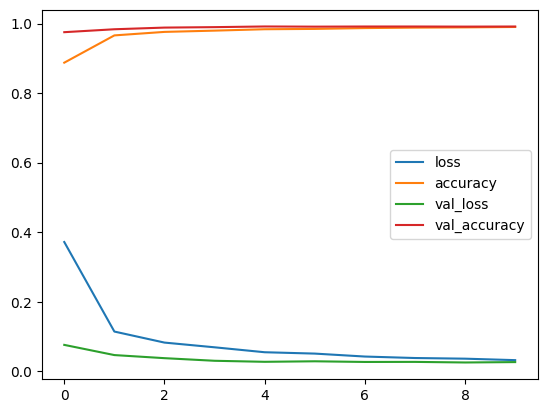

In [45]:
loss_df.plot()

In [46]:
test_loss, test_acc = model.evaluate(xtest, ytest, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 4s - loss: 0.0265 - accuracy: 0.9914 - 4s/epoch - 13ms/step
Test accuracy: 0.9914000034332275
